In [1]:
import easyocr
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
from glob import glob
import os
import re
import copy
import math
import time
import pandas as pd
import imutils

reader = easyocr.Reader(['en','ko'], gpu=True)

In [2]:
workdir = "C:/Users/smcljy/data/20211210_OCR_hakathon/medicine/images"

filelist = []

for (root, directories, files) in os.walk(workdir):
    for file in files:
        if '.jpg' in file.lower():
            file_path = os.path.join(root, file)
            filelist.append(file_path)
        if '.jpeg' in file.lower():
            file_path = os.path.join(root, file)
            filelist.append(file_path)
            
# filelist

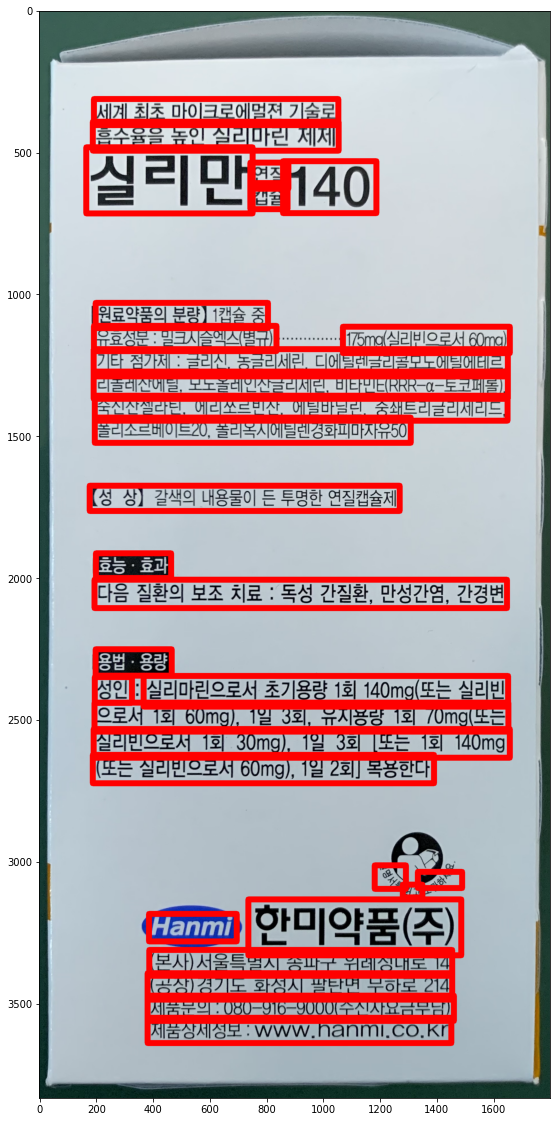

In [4]:
img = cv2.imread(filelist[6])

ratio = 1.0

x_ratio = ratio
y_ratio = ratio
# ret, img = cv2.threshold(img, 155,255, cv2.THRESH_BINARY_INV)
bbx = cv2.resize(img, dsize=(0,0), fx=x_ratio, fy=y_ratio, interpolation=cv2.INTER_LINEAR)

result = reader.readtext(bbx,adjust_contrast=0.3,width_ths=0.7)#))

for (bbox, text, prob) in result: 
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(bbx, tl, br, (255, 0, 0), 20)
#   cv2.putText(bbx, text, (tl[0]-25, tl[1]+15),
#     cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
  # texts.pytesseract.image_to_string(bbx[tl[1]:br[1], tl[0]:br[0]],config=configs).split())plit())
plt.rcParams['figure.figsize'] = (20,20)
plt.imshow(bbx)

In [5]:
# detection box 상단부터 정렬
result = sorted(result, key=lambda x: (x[0][0][1]))
result

[([[193, 313], [1054, 313], [1054, 405], [193, 405]],
  '세계 최초 마이크로에서전 기술로',
  0.6619420966138928),
 ([[189, 393], [1055, 393], [1055, 495], [189, 495]],
  '훔수울올 높인 실리마린 제제',
  0.48214724530038156),
 ([[166, 483], [752, 483], [752, 716], [166, 716]], '실리만', 0.9999815547846606),
 ([[859, 532], [1188, 532], [1188, 715], [859, 715]],
  '140',
  0.7963679727914116),
 ([[744, 537], [878, 537], [878, 629], [744, 629]], '연질', 0.9991516050927877),
 ([[744, 609], [875, 609], [875, 701], [744, 701]], '캠술', 0.9426292457508368),
 ([[199, 1031], [806, 1031], [806, 1120], [199, 1120]],
  '원료악품의 분량) 1캠술 중',
  0.34738751017225855),
 ([[193, 1112], [836, 1112], [836, 1201], [193, 1201]],
  '유요성분 : 밀코시슬렉스별규)',
  0.5089420685758047),
 ([[1070, 1115], [1658, 1115], [1658, 1208], [1070, 1208]],
  '175mg(실리반으로서 6Orrg)',
  0.32550074299920717),
 ([[192, 1194], [1651, 1194], [1651, 1290], [192, 1290]],
  '기타 철가제 : 글리신 농글리세린 디에탤랜글리올모노에탤에l로',
  0.13414875609303747),
 ([[192, 1273], [1651, 1273], [1651, 1369], [

In [6]:
result_text = []

for result in result:
    result_text.append(result[1])

result_text

df = pd.DataFrame(result_text)

df

,0
0,세계 최초 마이크로에서전 기술로
1,훔수울올 높인 실리마린 제제
2,실리만
3,140
4,연질
5,캠술
6,원료악품의 분량) 1캠술 중
7,유요성분 : 밀코시슬렉스별규)
8,175mg(실리반으로서 6Orrg)
9,기타 철가제 : 글리신 농글리세린 디에탤랜글리올모노에탤에l로


In [9]:
img = cv2.imread(filelist[6])

ratio = 1.0

x_ratio = ratio
y_ratio = ratio
# ret, img = cv2.threshold(img, 155,255, cv2.THRESH_BINARY_INV)
bbx = cv2.resize(img, dsize=(0,0), fx=x_ratio, fy=y_ratio, interpolation=cv2.INTER_LINEAR)

results = reader.readtext(bbx,width_ths=0.7)#))

# detection region x,y points ± 5
for i in range(len(results)):
    y_start = round(results[i][0][0][1])-5 if round(results[i][0][0][1])-5 > 0 else 0
    y_end = round(results[i][0][2][1])+5 if round(results[i][0][0][1])+5 < img.shape[0] else img.shape[0]
    x_start = round(results[i][0][0][0])-5 if round(results[i][0][0][0])-5 > 0 else 0
    x_end = round(results[i][0][1][0])+5 if round(results[i][0][0][0])+5 < img.shape[1] else img.shape[1]
    region = bbx[y_start:y_end, x_start:x_end].copy()
    configs = '-l kor+eng --psm 8'
    text = pytesseract.image_to_string(region#,lang=('kor+eng')
                                      ,config=configs
                                      )#.split('\n')#,config=configs).split()
    print(text)


세계 최초 마이크로에멀젼 기술로

흡수율을 높인 실리마린 제제

실리만

연질

ws

140

원료약품의 분량】 1캡슬 중

유효성분 : 밀크시슬엑시별규)

1750709실리빈으로서 070!

기타 첨가제 : 글리신, 농글리세린, 디에틸렌글리콜모노에틸에테르,

리놀레산에틸, 모노올레인산글리세린, 비타민ㄷ#*-0-토코페롤),

숙신산젤라틴, 에리쏘르빈산, 에틸바닐린, 중쇄트리글리세리드,

폴리소르베이트20, 폴리옥시에틸렌경화피마자유50

【성 4) 갈색의 내용물이 든 투명한 연질캡술제

효능ㆍ효과

다음 질환의 보조 치료 : 독성 간질환, 만성간염, 간경변

용법 ㆍ용량,

성인

실리마린으로서 초기용량 1회 110779[또는 실리빈

으로서 1회 60mg), 1일 3회, 유지용량 1회 7079(또는

실리빈으로서 1회 30mg), 1일 3회 [또는 1회 140mg

(또는 실리빈으로서 60779), 1일 2회] 복용한다

유고"

Hanmi.

한미약품(주)

(본사)서울특별시 송파구 위례성대로 14

(공장)경기도 화성시 팔탄면 무하로 214

제품문의: 080-916-9000/(수신자요금부담)

제품상세정보 :\\\.11310001.00ㅇ.1<「

K



ValueError: tile cannot extend outside image